# Data Analyst Summary
### Pandas tools and Data analyst

## Table of contents

* [Introduction: some usefull tools](#introduction)
1) [Cleaning, modifying](#clean_modify)
* [Dropping values, Finding and managing with NaNs, rename columns](#NaNs_dropping)
    * [Dropping](#Dropping)
    * [NaNs](#NaN)
    * [Rename columns ](#name_columns)
* [Cleaning data](#Cleaning_data)
    * [Searching for columns names (like %%)](#like_name_columns)
    * [If conditions drop columns or rows](#if_condition_drop)
* [Dealing with NaNs and dtypes](#deal_with_nans)
    * [Counting missing data](#count_nans)
    * [Methods](#nans_dealing_methos)
    * [Convering dtypes](#convert_dtypes)
* [Binning](#binning)
* [Indicator variable (or dummy variable)](#dummy_creation)
2) [ANALYSIS](#analysis)
* [Correlation](#correlation)
    * [Pivot](#pivot)
    * [Correlation and Causation](#corr_caus)
     
       
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

In [2]:
import pandas as pd



## Introduction: some usefull tools <a name="introduction"></a>

In [3]:
pd.set_option('display.max_columns', None)



## Dropping values, Finding and managing with NaNs, rename columns  <a name="NaNs_dropping"></a>

### Dropping values <a name="Dropping"></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [5]:
df = pd.read_csv("data.csv")
# To display the top 5 rows 
df.head(5)  

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [7]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [8]:
duplicated = df[df.duplicated()]

In [9]:
duplicated[duplicated['Make'] == 'Suzuki']

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
4223,Suzuki,Esteem,2000,122.0,4.0,MANUAL,front wheel drive,31,24,2000
6287,Suzuki,Kizashi,2012,180.0,4.0,AUTOMATIC,all wheel drive,29,22,27549
6288,Suzuki,Kizashi,2012,180.0,4.0,AUTOMATIC,front wheel drive,30,23,26199
9182,Suzuki,Sidekick,1996,95.0,4.0,MANUAL,rear wheel drive,24,21,2000
9183,Suzuki,Sidekick,1996,95.0,4.0,MANUAL,four wheel drive,24,21,2000
9184,Suzuki,Sidekick,1996,120.0,4.0,MANUAL,four wheel drive,23,20,2000
9189,Suzuki,Sidekick,1997,95.0,4.0,MANUAL,rear wheel drive,24,21,2000
9191,Suzuki,Sidekick,1997,95.0,4.0,MANUAL,four wheel drive,24,21,2000
9197,Suzuki,Sidekick,1998,95.0,4.0,MANUAL,four wheel drive,24,21,2000
10112,Suzuki,Swift,2000,79.0,4.0,MANUAL,front wheel drive,38,31,2000


In [10]:
df.count()      # Used to count the number of rows

Make                 11914
Model                11914
Year                 11914
Engine HP            11845
Engine Cylinders     11884
Transmission Type    11914
Driven_Wheels        11914
highway MPG          11914
city mpg             11914
MSRP                 11914
dtype: int64

In [11]:
df = df.drop_duplicates()

In [12]:
df.count()

Make                 10925
Model                10925
Year                 10925
Engine HP            10856
Engine Cylinders     10895
Transmission Type    10925
Driven_Wheels        10925
highway MPG          10925
city mpg             10925
MSRP                 10925
dtype: int64

### Rename columns <a name="name_columns"></a>

In [13]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [14]:
df.shape

(10925, 10)

### Findind NaNs Values <a name="NaN"></a>

In [15]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


### Pandas TO NUMERIC ELSE NaN

In [16]:
df[['Year', 'HP', 'Cylinders', 
    'MPG-H', 'MPG-C', 'Price' ]] = df[['Year', 'HP', 'Cylinders',
                                       'MPG-H', 'MPG-C', 'Price']].apply(pd.to_numeric, errors='coerce')
# The default return dtype is float64 or int64 depending on the data supplied
# If ‘coerce’, then invalid parsing will be set as NaN.

In [17]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [18]:
df.head(10)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,28,18,31200
6,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,26,17,44100
7,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,28,20,39300
8,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,28,18,36900
9,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,27,18,37200


### Dropping the rows having a specific column with a NaN value

In [ ]:
df = df[pd.notnull(df['HP'])]
df = df.reset_index(drop=True)
print(df.isnull().sum())

In [ ]:
#other method and a better method
df = df.dropna(subset=["HP"], axis=0)
df = df.reset_index(drop=True)
print(df.isnull().sum())

### Dropping all the rows having a NaN value in any column

In [20]:
df = df.dropna()    # Dropping the missing values.
print(df.isnull().sum())

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


## Differents methods to clean data  <a name="Cleaning_data"></a>

In [1]:
import pandas as pd # import library to read data into dataframe
import numpy as np # import numpy library
import re # import library for regular expression

In [2]:
recipes = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/recipes.csv")

print("Data read into dataframe!") # takes about 30 seconds

Data read into dataframe!


In [3]:
recipes.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


## Searching for columns names (like %%) <a name="like_name_columns"></a>

In [4]:
ingredients = list(recipes.columns.values)

print([match.group(0) for ingredient in ingredients for match in [(re.compile(".*(rice).*")).search(ingredient)] if match])
print([match.group(0) for ingredient in ingredients for match in [(re.compile(".*(wasabi).*")).search(ingredient)] if match])
print([match.group(0) for ingredient in ingredients for match in [(re.compile(".*(soy).*")).search(ingredient)] if match])

['brown_rice', 'licorice', 'rice']
['wasabi']
['soy_sauce', 'soybean', 'soybean_oil']


## If conditions drop columns or rows <a name="if_condition_drop"></a>

In [5]:
column_names = recipes.columns.values
column_names[0] = "cuisine"
recipes.columns = column_names

recipes

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57686,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57687,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57688,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57689,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [6]:
recipes["cuisine"] = recipes["cuisine"].str.lower()

In [7]:
recipes.loc[recipes["cuisine"] == "austria", "cuisine"] = "austrian"
recipes.loc[recipes["cuisine"] == "belgium", "cuisine"] = "belgian"
recipes.loc[recipes["cuisine"] == "china", "cuisine"] = "chinese"
recipes.loc[recipes["cuisine"] == "canada", "cuisine"] = "canadian"
recipes.loc[recipes["cuisine"] == "netherlands", "cuisine"] = "dutch"
recipes.loc[recipes["cuisine"] == "france", "cuisine"] = "french"
recipes.loc[recipes["cuisine"] == "germany", "cuisine"] = "german"
recipes.loc[recipes["cuisine"] == "india", "cuisine"] = "indian"
recipes.loc[recipes["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes.loc[recipes["cuisine"] == "iran", "cuisine"] = "iranian"
recipes.loc[recipes["cuisine"] == "italy", "cuisine"] = "italian"
recipes.loc[recipes["cuisine"] == "japan", "cuisine"] = "japanese"
recipes.loc[recipes["cuisine"] == "israel", "cuisine"] = "israeli"
recipes.loc[recipes["cuisine"] == "korea", "cuisine"] = "korean"
recipes.loc[recipes["cuisine"] == "lebanon", "cuisine"] = "lebanese"
recipes.loc[recipes["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes.loc[recipes["cuisine"] == "mexico", "cuisine"] = "mexican"
recipes.loc[recipes["cuisine"] == "pakistan", "cuisine"] = "pakistani"
recipes.loc[recipes["cuisine"] == "philippines", "cuisine"] = "philippine"
recipes.loc[recipes["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes.loc[recipes["cuisine"] == "spain", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "portugal", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "switzerland", "cuisine"] = "swiss"
recipes.loc[recipes["cuisine"] == "thailand", "cuisine"] = "thai"
recipes.loc[recipes["cuisine"] == "turkey", "cuisine"] = "turkish"
recipes.loc[recipes["cuisine"] == "vietnam", "cuisine"] = "vietnamese"
recipes.loc[recipes["cuisine"] == "uk-and-ireland", "cuisine"] = "uk-and-irish"
recipes.loc[recipes["cuisine"] == "irish", "cuisine"] = "uk-and-irish"

recipes

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57686,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57687,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57688,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57689,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [8]:
# get list of cuisines to keep
recipes_counts = recipes["cuisine"].value_counts()
cuisines_indices = recipes_counts > 50

cuisines_to_keep = list(np.array(recipes_counts.index.values)[np.array(cuisines_indices)])

In [9]:
recipes = recipes.loc[recipes['cuisine'].isin(cuisines_to_keep)]

In [10]:
recipes = recipes.replace(to_replace="Yes", value=1)
recipes = recipes.replace(to_replace="No", value=0)

In [11]:
recipes

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57686,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57687,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57688,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57689,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
check_recipes = recipes.loc[
    (recipes["rice"] == 1) &
    (recipes["soy_sauce"] == 1) &
    (recipes["wasabi"] == 1) &
    (recipes["seaweed"] == 1)
]

check_recipes

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
11306,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11321,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11361,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12171,asian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12385,asian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13010,asian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13159,asian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13513,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13586,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13625,east_asian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
ing = recipes.iloc[:, 1:].sum(axis=0)
ing

almond        2306
angelica         1
anise          223
anise_seed      87
apple         2420
              ... 
wood            33
yam             85
yeast         3385
yogurt        1033
zucchini      1102
Length: 383, dtype: int64

In [30]:
type(ing)

pandas.core.series.Series

In [31]:
ing = ing.reset_index()
ing

,index,0
0,almond,2306
1,angelica,1
2,anise,223
3,anise_seed,87
4,apple,2420
...,...,...
378,wood,33
379,yam,85
380,yeast,3385
381,yogurt,1033


In [32]:
type(ing)

pandas.core.frame.DataFrame

In [33]:
ing.columns = ['ingredients', 'count']
ing

,ingredients,count
0,almond,2306
1,angelica,1
2,anise,223
3,anise_seed,87
4,apple,2420
...,...,...
378,wood,33
379,yam,85
380,yeast,3385
381,yogurt,1033


In [35]:
cuisines = recipes.groupby("cuisine").mean()
cuisines.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
cuisine,,,,,,,,,,,,,,,,,,,,,
african,0.156522,0.000000,0.000000,0.000000,0.034783,0.000000,0.069565,0.0000,0.0,0.000000,...,0.000000,0.008696,0.043478,0.008696,0.017391,0.000000,0.008696,0.017391,0.000000,0.034783
american,0.040598,0.000025,0.003014,0.000573,0.052055,0.000623,0.011308,0.0001,0.0,0.006351,...,0.002964,0.006874,0.030809,0.014819,0.011009,0.000672,0.001445,0.068219,0.016912,0.018630
asian,0.007544,0.000000,0.000838,0.002515,0.012573,0.000000,0.005029,0.0000,0.0,0.000000,...,0.000838,0.001676,0.038558,0.001676,0.124895,0.000000,0.001676,0.004191,0.010897,0.011735
cajun_creole,0.000000,0.000000,0.000000,0.000000,0.006849,0.000000,0.000000,0.0000,0.0,0.000000,...,0.000000,0.006849,0.082192,0.000000,0.191781,0.000000,0.006849,0.034247,0.006849,0.000000
canadian,0.036176,0.000000,0.000000,0.000000,0.036176,0.000000,0.002584,0.0000,0.0,0.001292,...,0.002584,0.003876,0.029716,0.020672,0.003876,0.000000,0.001292,0.067183,0.019380,0.011628


In [44]:
num_ingredients = 4 # define number of top ingredients to print

# define a function that prints the top ingredients for each cuisine
def print_top_ingredients(row):
    print(row.name.upper())
    row_sorted = row.sort_values(ascending=False)*100
    top_ingredients = list(row_sorted.index.values)[0:num_ingredients]
    row_sorted = list(row_sorted)[0:num_ingredients]

    for ind, ingredient in enumerate(top_ingredients):
        print("%s (%d%%)" % (ingredient, row_sorted[ind]), end=' ')
    print("\n")

# apply function to cuisines dataframe
create_cuisines_profiles = cuisines.apply(print_top_ingredients, axis=1)

AFRICAN
onion (53%) olive_oil (52%) garlic (49%) cumin (42%) 

AMERICAN
butter (41%) egg (40%) wheat (39%) onion (29%) 

ASIAN
soy_sauce (49%) ginger (48%) garlic (47%) rice (41%) 

CAJUN_CREOLE
onion (69%) cayenne (56%) garlic (48%) butter (36%) 

CANADIAN
wheat (39%) butter (38%) egg (35%) onion (34%) 

CARIBBEAN
onion (51%) garlic (50%) vegetable_oil (31%) black_pepper (31%) 

CENTRAL_SOUTHAMERICAN
garlic (56%) onion (54%) cayenne (51%) tomato (41%) 

CHINESE
soy_sauce (68%) ginger (53%) garlic (52%) scallion (48%) 

EAST_ASIAN
garlic (55%) soy_sauce (50%) scallion (49%) cayenne (47%) 

EASTERN-EUROPE
wheat (53%) egg (52%) butter (48%) onion (45%) 

EASTERNEUROPEAN_RUSSIAN
butter (60%) egg (50%) wheat (49%) onion (38%) 

ENGLISH_SCOTTISH
butter (67%) wheat (62%) egg (53%) cream (41%) 

FRENCH
butter (50%) egg (44%) wheat (37%) olive_oil (27%) 

GERMAN
wheat (64%) egg (60%) butter (47%) onion (34%) 

GREEK
olive_oil (76%) garlic (44%) onion (36%) lemon_juice (33%) 

INDIAN
cumin (60%

## How to deal with Nans, diffrents methods <a name="deal_with_nans"></a>

In [45]:
# Read the online file by the URL provides above, and assign it to variable "df"
other_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(other_path, header=None)

In [46]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [47]:
df.columns = headers
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [54]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Counting missing data  <a name="count_nans"></a>

In [55]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

### Methods  <a name="nans_dealing_methos"></a>

<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
        c. replace it based on other functions
    </li>
</ol>


Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>

<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>

<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>

<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>


In [57]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h4>Replace "NaN" by mean value in "normalized-losses" column</h4>


In [58]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
avg_norm_loss

122.0

In [61]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

<h4>Replace NaN by mean value(frequency):</h4>


To see which values are present in a particular column, we can use the ".value_counts()" method:


In [60]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

We can see that four doors are the most common type. We can also use the ".idxmax()" method to calculate for us the most common type automatically:

In [62]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [63]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

<h4>Drop rows with NaN values:</h4>


In [64]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

### converting data types  <a name="convert_dtypes"></a>

In [65]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [66]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")



## Binning <a name="binning"></a>

<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins </p>

In [74]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

In [75]:
df[["horsepower"]] = df[["horsepower"]].astype("int")

In [85]:
max_horse =df["horsepower"].max()
min_horse = df["horsepower"].min() 

In [87]:
print(f"Max = {max_horse} \nMin = {min_horse}")

Max = 262 
Min = 48


Text(0.5, 1.0, 'horsepower bins')

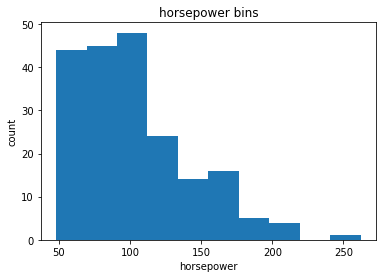

In [88]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [90]:
min(df["horsepower"])

48

In [91]:
bins = np.linspace( min_horse,  max_horse, 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [92]:
group_names = ['Low', 'Medium', 'High']

 We apply the function "cut" the determine what each value of "df['horsepower']" belongs to. 


In [94]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Text(0.5, 1.0, 'horsepower bins')

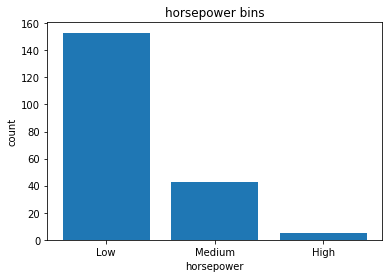

In [95]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

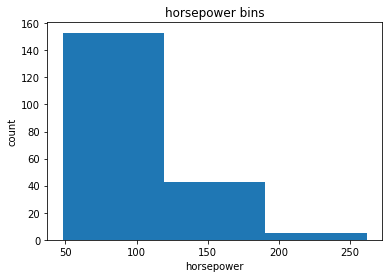

In [96]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")



## Indicator / Dummy variable <a name="dummy_creation"></a>

<b>Example</b>
<p>
    We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.
</p>

<p>
    We will use the panda's method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>

In [97]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [98]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [99]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)



# Analysis <a name="analysis"></a>



# Correlation <a name="correlation"></a>



## Pivot <a name="pivot"></a>

In [100]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [101]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [102]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline 

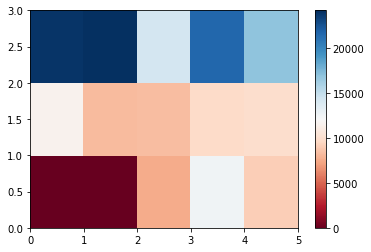

In [105]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

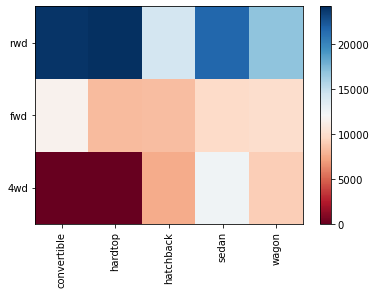

In [106]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()



## Correlation and Causation <a name="corr_caus"></a>

<b>P-value</b>: 

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


In [107]:
from scipy import stats

In [108]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


In [109]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8097290352560285  with a P-value of P =  5.924001027593172e-48
